# KED Microthesauri

In [32]:
# init
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.text import *
import pandas as pd
from pathlib import Path

bs = 32

In [33]:
# combine to two df

FN = '../ked_data/converted_prep_mt.csv'


## Reuse Fine-tuned of the language model 


In [17]:
data_lm = load_data(Path('.'), 'data_lm.pkl', bs=bs)

In [34]:
data_lm.show_batch()

idx,text
0,communitys creditor institution agree agreement < date > enter budget reserve relate lending guarantee operation country mechanism guarantee draw cash resource < reference > council < legalact > euratom decision eec euratom system community resource guarantee fund constitute payment resource whereas fund interest resource amount recover default debtor fund guarantee whereas reference practice institution ratio % guarantee fund resource guarantee liability increase interest whereas payment guarantee fund % amount operation
1,piece knit crochet fabric form manufacture yarn â manufacture fibre card comb process material textile pulp chapter < reference > apparel knit crochet manufacture yarn women clothe clothing accessory baby embroider manufacture yarn manufacture value use % price product ex equipment fabric cover foil polyester manufacture yarn manufacture value use % price product handkerchief scarf muffler mantilla veil â manufacture yarn manufacture value use % price product manufacture unbleache yarn
2,infringement intensity instruction dealer arrangement concern supply bonus policy end < date > mid -<date > infringement lift concern bonus policy regard element sale opel dealer mid end < date > infringement provision account consideration commission increase amount % euro amount eur euro determination account attenuate factor case commission argument opel nederland bv action factor commission conclusion argument duration infringement account respect duration commission inspection < date > opel nederland
3,limit result confidence level % difference result series analysis laboratory application method mixture case test report state analysis conduct accordance method detail pretreatment result mean accuracy > table > method acetate fibre method field application method removal matter mixture acetate wool animal hair silk cotton flax hemp jute abaca alfa coir broom ramie sisal cupro protein acrylic polyamide nylon polyester circumstance method acetate fibre xxunk surface principle dissolve mass mixture
4,date > p derogation < reference > apply concern subunit pig kill examination sample accordance instruction competent authority application preventive kill pig suspect contaminate asf virus accordance < reference > sampling concern subunit measure prejudice examination sample hold carry accordance instruction competent authority collect ileum swine fever community reference laboratory licence sample asf virus member state sample eu copy import permit laboratory transport envelope package fluorescein isothiocyanate xxbos council decision


## Train a classifier

As we are using multi-label classification, we define our own metrics (fastai doesn't support multi-label well yet)

In [35]:
def my_prc(log_preds, targs, thresh=0.5, epsilon=1e-8):
    pred_pos = (log_preds > thresh).float()
    tpos = torch.mul((targs == pred_pos).float(), targs.float())
    return (tpos.sum()/(pred_pos.sum() + epsilon))#.item()
  
def my_rec(log_preds, targs, thresh=0.5, epsilon=1e-8):
    pred_pos = (log_preds > thresh).float()
    tpos = torch.mul((targs == pred_pos).float(), targs.float())
    return (tpos.sum()/(targs.sum() + epsilon))

thresh=0.001
acc_0001 = partial(accuracy_thresh, thresh=thresh)
prc_0001 = partial(my_prc, thresh=thresh)
rec_0001 = partial(my_rec, thresh=thresh)
f_0001 = partial(fbeta, thresh=thresh, beta=1)


thresh=0.01
acc_001 = partial(accuracy_thresh, thresh=thresh)
prc_001 = partial(my_prc, thresh=thresh)
rec_001 = partial(my_rec, thresh=thresh)
f_001 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.05
acc_005 = partial(accuracy_thresh, thresh=thresh)
prc_005 = partial(my_prc, thresh=thresh)
rec_005 = partial(my_rec, thresh=thresh)
f_005 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.1
acc_01 = partial(accuracy_thresh, thresh=thresh)
prc_01 = partial(my_prc, thresh=thresh)
rec_01 = partial(my_rec, thresh=thresh)
f_01 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.2
acc_02 = partial(accuracy_thresh, thresh=thresh)
prc_02 = partial(my_prc, thresh=thresh)
rec_02 = partial(my_rec, thresh=thresh)
f_02 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.3
acc_03 = partial(accuracy_thresh, thresh=thresh)
prc_03 = partial(my_prc, thresh=thresh)
rec_03 = partial(my_rec, thresh=thresh)
f_03 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.4
acc_04 = partial(accuracy_thresh, thresh=thresh)
prc_04 = partial(my_prc, thresh=thresh)
rec_04 = partial(my_rec, thresh=thresh)
f_04 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.5
acc_05 = partial(accuracy_thresh, thresh=thresh)
prc_05 = partial(my_prc, thresh=thresh)
rec_05 = partial(my_rec, thresh=thresh)
f_05 = partial(fbeta, thresh=thresh, beta=1)


In [8]:
print(FN)

../ked_data/converted_prep_mt.csv


In [9]:
data_clas = (TextList.from_csv(Path('.'), FN, vocab=data_lm.vocab, cols='text')
             #grab all the text files in path
             #wohlg: .split_by_folder(valid='test')
             .split_by_rand_pct()
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)             
             #wohlg: .label_from_folder(classes=['neg', 'pos'])
             .label_from_df(cols='labels', label_delim=';')
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas_mt.pkl')

In [10]:
print(len(data_lm.vocab.itos))
print(data_lm.vocab.itos[:20])

60000
['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep', '>', '<', 'reference', 'date', 'legalact', 'commission', 'state', 'member', 'community', 'product', 'decision']


In [36]:
data_clas = load_data(Path('.'), 'data_clas_mt.pkl', bs=bs)

In [15]:
data_clas.show_batch()

text,target
xxbos section commission content â volume section commission â title surplus â title revenue person work institution community body â title revenue operation institution â title contribution refund connection community agreement programme â title interest payment â title borrow lending operation â revenue â title xx expenditure allocate policy area â chapter xx expenditure allocate policy area â title affair â chapter expenditure affair policy area â chapter union â,100177;100205
xxbos commission < legalact > eec < date > provision implementation council < legalact > eec community custom code commission community treaty community regard council < legalact > eec community custom code [ ] hereinafter refer code < reference > thereof [ ] whereas custom legislation instrument whereas time code modification legislation coherent simplify plug whereas community legislation area reason adoption code legislation whereas bring < legalact > custom implement,100175;100178;100192
xxbos commission < legalact > < date > progress th time council < legalact > approximation law < legalact > provision relate classification package substance commission community treaty community council < legalact > < date > approximation law < legalact > provision relate classification package substance commission < legalact > thereof whereas eec contain list substance classification procedure respect substance list number substance commission accordance abovementione < legalact > measure,100175;100196;100220;100244
xxbos commission < legalact > progress time council < legalact > approximation law < legalact > provision relate classification package substance commission community treaty community regard council < legalact > < date > approximation law < legalact > provision relate classification package substance < legalact > eec thereof p whereas < reference > council < legalact > < date > approximation law < legalact > provision relate classification package preparation,100175;100196;100220;100244
xxbos parliament council < date > recognition qualification eea relevance parliament council union regard treaty community < reference > sentence < reference > regard proposal commission [ ] regard opinion committee [ ] act accordance procedure < reference > treaty [ ] whereas pursuant < reference > treaty abolition member state obstacle movement person service objective community member state pursue profession selfemploy capacity member state qualification addition < reference >,100215;100216;100232


In [37]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, wd=0.1)
#learn.metrics = [accuracy_thresh, custom_precision, custom_recall, 
#                 acc_01, f_score_01, acc_02, f_score_02, acc_03, f_score_03 ]
learn.metrics = [accuracy_thresh, 
                 acc_0001, prc_0001, rec_0001, f_0001,
                 acc_001, prc_001, rec_001, f_001,
                 acc_005, prc_005, rec_005, f_005,
                 acc_01, prc_01, rec_01, f_01,
                 acc_02, prc_02, rec_02, f_02,
                 acc_03, prc_03, rec_03, f_03,
                 acc_04, prc_04, rec_04, f_04,
                 acc_05, prc_05, rec_05, f_05 ]
#!mv *pth models
learn.load_encoder('fine_tuned_enc-KED-prep')


In [7]:
print(learn.loss_func)
print(learn.loss_func.func)

FlattenedLoss of BCEWithLogitsLoss()
BCEWithLogitsLoss()


In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


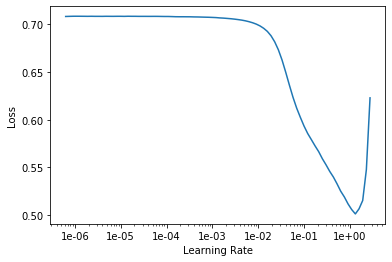

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(3, slice(1e-1,1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,time
0,0.109410,0.120245,0.961365,0.207606,0.610366,0.281403,0.091867,0.605257,0.610726,0.279807,0.173938,0.850912,0.614756,0.271879,0.320372,0.912989,0.620013,0.263376,0.402171,0.947403,0.632701,0.246553,0.453026,0.957509,0.641245,0.228033,0.439070,0.960584,0.653374,0.213573,0.389932,0.961365,0.667477,0.198656,0.328431,05:42
1,0.098715,0.094445,0.968173,0.320614,0.649165,0.380769,0.106664,0.674284,0.651131,0.379299,0.197142,0.870128,0.656290,0.370505,0.339693,0.919960,0.666227,0.360137,0.418613,0.950797,0.685108,0.340335,0.480175,0.961611,0.699777,0.319631,0.485549,0.966154,0.715095,0.300863,0.463348,0.968173,0.731471,0.281747,0.426521,06:13
2,0.085113,0.077601,0.972984,0.353948,0.772056,0.425594,0.110315,0.733400,0.772796,0.423245,0.230663,0.906618,0.778297,0.416079,0.423527,0.944502,0.784841,0.406372,0.518759,0.965106,0.797184,0.387976,0.580856,0.971251,0.807296,0.367924,0.581905,0.973055,0.817059,0.351928,0.552448,0.972984,0.827647,0.334028,0.501673,06:45


In [21]:
learn.save('first_mt')

In [ ]:
learn.load('first_mt')

In [9]:
learn.freeze_to(-2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


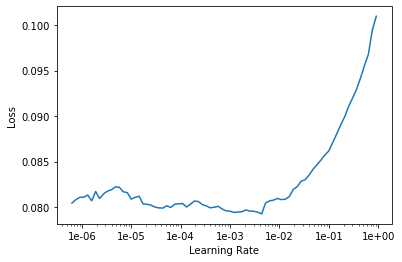

In [24]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(3, slice(2e-3/(2.6**4),2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,time
0,0.082355,0.076454,0.973352,0.358656,0.784163,0.427391,0.110762,0.742062,0.784705,0.425485,0.234405,0.909907,0.791236,0.418706,0.429844,0.945957,0.795486,0.409430,0.523418,0.966304,0.805482,0.391232,0.588547,0.971926,0.814831,0.372449,0.585193,0.973484,0.824353,0.354734,0.551466,0.973352,0.836979,0.337650,0.501113,07:01
1,0.077760,0.072927,0.974562,0.416348,0.783746,0.470722,0.121328,0.770574,0.784608,0.469210,0.257507,0.916684,0.789481,0.462054,0.452793,0.948647,0.796644,0.453954,0.542082,0.966896,0.806729,0.435339,0.602113,0.972760,0.816046,0.420010,0.608909,0.974598,0.825919,0.403336,0.586199,0.974562,0.835458,0.387166,0.545048,05:45
2,0.075349,0.071953,0.974970,0.389056,0.788981,0.478499,0.116466,0.757108,0.790552,0.476022,0.248102,0.914895,0.795594,0.468490,0.449657,0.948703,0.801896,0.461035,0.544344,0.967522,0.812949,0.443990,0.609679,0.973238,0.821668,0.426995,0.616308,0.974869,0.830488,0.409709,0.592879,0.974970,0.840610,0.392461,0.552768,05:44


In [11]:
learn.save('second_mt')

In [21]:
learn.load('second_mt')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (15613 items)
x: TextList
xxbos council < legalact > euratom guarantee fund action council union regard treaty community < reference > thereof regard treaty energy community < reference > thereof regard proposal commission regard opinion parliament opinion court auditor budget community increase risk result guarantee cover loan country council < date > conclude consideration prudent management discipline call mechanism fund set order cover risk loan guarantee cover loan country project country meet guarantee fund communitys creditor institution agree agreement < date > enter budget reserve relate lending guarantee operation country mechanism guarantee draw cash resource < reference > council < legalact > euratom decision eec euratom system community resource guarantee fund constitute payment resource whereas fund interest resource amount recover default debtor fund guarantee whereas reference practice institution ratio % guarantee fu

In [22]:
learn.freeze_to(-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


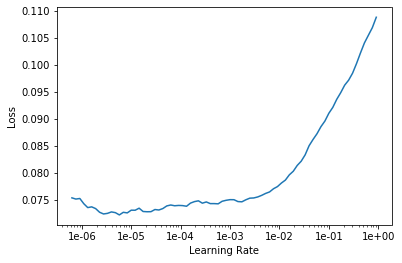

In [14]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(4, slice(2e-3/(2.6**4),2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,time
0,0.077913,0.071360,0.975192,0.428271,0.775356,0.502576,0.126279,0.769241,0.776501,0.500814,0.261877,0.915564,0.782583,0.493367,0.456270,0.948153,0.787767,0.484693,0.546958,0.967213,0.797441,0.467393,0.613724,0.972896,0.808068,0.447705,0.622516,0.974905,0.818137,0.431802,0.606038,0.975192,0.827382,0.414789,0.571126,07:07
1,0.074643,0.068615,0.976052,0.414073,0.795451,0.509819,0.122936,0.769423,0.796185,0.508319,0.264120,0.921176,0.801017,0.501502,0.473405,0.952528,0.805758,0.494018,0.567194,0.969655,0.817682,0.477635,0.630421,0.974509,0.828557,0.461509,0.634142,0.976013,0.837391,0.444683,0.612952,0.976052,0.845316,0.428774,0.577945,09:01
2,0.070535,0.066070,0.976933,0.436252,0.801157,0.534635,0.128845,0.780191,0.802024,0.532969,0.275170,0.924055,0.807260,0.526737,0.484508,0.954551,0.813017,0.519168,0.581025,0.970584,0.823302,0.501270,0.644244,0.975294,0.835126,0.484914,0.651386,0.976756,0.843595,0.469450,0.634082,0.976933,0.850106,0.453289,0.602848,08:59
3,0.065954,0.065202,0.977291,0.467136,0.804910,0.541991,0.135106,0.794257,0.805843,0.540789,0.287234,0.927933,0.809055,0.534762,0.496834,0.956076,0.814236,0.528302,0.589347,0.971302,0.826197,0.512588,0.652228,0.975643,0.835961,0.498574,0.655817,0.977156,0.845254,0.483430,0.640256,0.977291,0.853505,0.468641,0.609916,08:55


In [24]:
learn.save('third_mt')

In [25]:
learn.load('third_mt')

/home/wohlg/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/basic_train.py:326: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


RNNLearner(data=TextClasDataBunch;

Train: LabelList (15613 items)
x: TextList
xxbos council < legalact > euratom guarantee fund action council union regard treaty community < reference > thereof regard treaty energy community < reference > thereof regard proposal commission regard opinion parliament opinion court auditor budget community increase risk result guarantee cover loan country council < date > conclude consideration prudent management discipline call mechanism fund set order cover risk loan guarantee cover loan country project country meet guarantee fund communitys creditor institution agree agreement < date > enter budget reserve relate lending guarantee operation country mechanism guarantee draw cash resource < reference > council < legalact > euratom decision eec euratom system community resource guarantee fund constitute payment resource whereas fund interest resource amount recover default debtor fund guarantee whereas reference practice institution ratio % guarantee fu

In [26]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


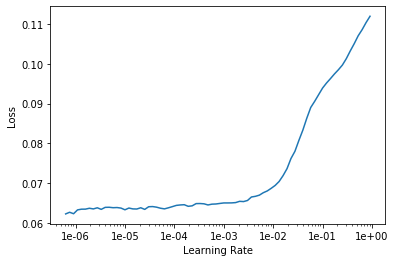

In [27]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(15, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7)) 


epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,time
0,0.065666,0.065039,0.977333,0.459106,0.801154,0.547397,0.133200,0.790599,0.801710,0.545974,0.283934,0.926762,0.806048,0.540193,0.493797,0.955590,0.812417,0.532088,0.588042,0.971040,0.823414,0.517699,0.650898,0.975674,0.833943,0.502812,0.658604,0.977120,0.842488,0.488035,0.642767,0.977333,0.850812,0.471688,0.614558,09:20


In [ ]:
learn.save('final_mt')

In [38]:
learn.load('final_mt')


RNNLearner(data=TextClasDataBunch;

Train: LabelList (15613 items)
x: TextList
xxbos council < legalact > euratom guarantee fund action council union regard treaty community < reference > thereof regard treaty energy community < reference > thereof regard proposal commission regard opinion parliament opinion court auditor budget community increase risk result guarantee cover loan country council < date > conclude consideration prudent management discipline call mechanism fund set order cover risk loan guarantee cover loan country project country meet guarantee fund communitys creditor institution agree agreement < date > enter budget reserve relate lending guarantee operation country mechanism guarantee draw cash resource < reference > council < legalact > euratom decision eec euratom system community resource guarantee fund constitute payment resource whereas fund interest resource amount recover default debtor fund guarantee whereas reference practice institution ratio % guarantee fu

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


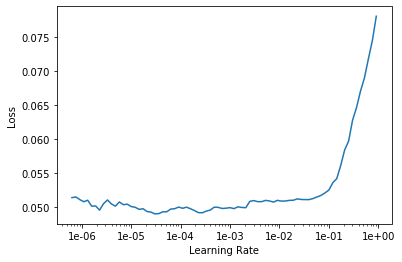

In [45]:
learn.load('final_mt')

learn.lr_find()
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(4, slice(2e-3/(2.6**4),2e-3), moms=(0.8,0.7), wd=0.1) 

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,time
0,0.052654,0.061341,0.979425,0.572378,0.809147,0.609953,0.168885,0.842083,0.809706,0.608890,0.350959,0.942116,0.813228,0.603848,0.553287,0.962652,0.818091,0.597088,0.633335,0.974090,0.826936,0.585478,0.682357,0.977630,0.835819,0.571928,0.691378,0.979039,0.843477,0.559435,0.683665,0.979425,0.849802,0.549114,0.665389,07:35
1,0.052818,0.061058,0.979344,0.538509,0.804951,0.611585,0.155518,0.828683,0.805775,0.610893,0.329123,0.938891,0.809726,0.605674,0.541141,0.961362,0.815662,0.599558,0.626086,0.973626,0.824790,0.588135,0.681132,0.977465,0.834519,0.573904,0.691222,0.978863,0.842560,0.562003,0.683733,0.979344,0.849692,0.549958,0.665588,06:04
2,0.051061,0.060814,0.979419,0.550285,0.814042,0.603366,0.158307,0.839678,0.814780,0.602156,0.340996,0.943000,0.818438,0.597134,0.555047,0.963451,0.822140,0.590187,0.636183,0.974501,0.831913,0.578541,0.684943,0.978031,0.840532,0.567052,0.693148,0.979222,0.848282,0.555405,0.683122,0.979419,0.855578,0.542893,0.661143,07:21
3,0.052029,0.060846,0.979499,0.564320,0.815726,0.604055,0.163244,0.845613,0.816324,0.602311,0.349912,0.944798,0.819724,0.597272,0.562418,0.964391,0.824975,0.590620,0.640500,0.974863,0.834010,0.579214,0.687353,0.978175,0.842599,0.567345,0.694360,0.979356,0.849497,0.555058,0.684127,0.979499,0.855722,0.543269,0.663027,06:46


In [47]:
learn.save('post_final_mt')

In [82]:
learn

RNNLearner(data=TextClasDataBunch;

Train: LabelList (14016 items)
x: TextList
xxbos commission community com proposal < legalact > parliament council recognition navigability licence inland memorandum context people commission attach importance simplify community law clearer citizen opportunity chance use aim provision time instrument research work instrument rule reason codification rule community law transparent < date > commission instruct staff act amendment stress requirement department endeavour interval text community rule conclusion presidency council stress importance codification certainty law matter time codification compliance community procedure change substance instrument codification parliament council commission agreement date < date > procedure adoption codification instrument purpose proposal codification < legalact > < date > recognition navigability licence inland < legalact > act incorporate proposal content act hence bring amendment require codification exercise 

## Evaluate the results
Based on: https://www.kaggle.com/nadjetba/text-to-meaning-with-multi-label-classification?scriptVersionId=12686831

In [49]:
#learn.load('final_prep')
# Predict on the validation dataset
y_pred, y_true =  learn.get_preds()


In [50]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
thresh = 0.34


print("F1 (micro)", f1_score(y_true, y_pred>thresh, average='micro'))
print("P (micro)", precision_score(y_true, y_pred>thresh, average='micro'))
print("R (micro)", recall_score(y_true, y_pred>thresh, average='micro'))

print("\nF1 (macro)", f1_score(y_true, y_pred>thresh, average='macro'))
print("P (macro)", precision_score(y_true, y_pred>thresh, average='macro'))
print("R (macro) ", recall_score(y_true, y_pred>thresh, average='macro'))


In [52]:
f1_score(y_true, y_pred>thresh, average='macro')

0.544224060411219

In [53]:
y_true_n = y_true.numpy()
scores = y_pred.numpy()
scores.shape, y_true_n.shape

((3903, 126), (3903, 126))

In [55]:
metrics = classification_report(y_true_n, scores>thresh, target_names=data_clas.valid_ds.classes)
print(metrics)

              precision    recall  f1-score   support

      100163       0.00      0.00      0.00        25
      100164       0.00      0.00      0.00         0
      100165       1.00      0.20      0.33         5
      100166       0.00      0.00      0.00         4
      100167       0.00      0.00      0.00        12
      100168       0.73      0.52      0.60        95
      100169       0.57      0.40      0.47       137
      100170       0.66      0.72      0.69       308
      100171       0.67      0.61      0.64       495
      100172       0.32      0.30      0.31        30
      100173       0.56      0.35      0.43        26
      100174       0.77      0.72      0.75       259
      100175       0.62      0.47      0.53       476
      100176       0.72      0.76      0.74       825
      100177       0.81      0.78      0.80       286
      100178       0.40      0.08      0.13        25
      100179       0.46      0.22      0.29        88
      100180       0.56    

/home/wohlg/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wohlg/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/wohlg/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [54]:
## precision at k
def tmp_precision(actual, predicted):
    #print(predicted)
    actual_one = np.where(actual == 1)[0]
    #print(actual_one)
    #print(type(actual_one))
    
    act_set = set(list(actual_one))
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(k)
    return result

def tmp_recall(actual, predicted):
    actual_one = np.where(actual == 1)[0]
    
    act_set = set(actual_one)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(len(act_set))
    return result

## sort indizes in descending order
scores_idx_sorted = (-scores).argsort() 
    
#print(precs)
for i in range(7):
    k = i+1
    
    precs, recas = [], []
    for i in range(len(y_true_n)):
        precs.append( tmp_precision(y_true_n[i], scores_idx_sorted[i]) )
        recas.append( tmp_recall(y_true_n[i], scores_idx_sorted[i]) )
    
    print("Precision at: %d:   " % (k,), sum(precs)/len(precs))
    print("Recall at: %d:   " % (k,), sum(recas)/len(recas))
    print()

Precision at: 1:    0.9123750960799385
Recall at: 1:    0.214903602105756

Precision at: 2:    0.8484499103253907
Recall at: 2:    0.38929237841613185

Precision at: 3:    0.7838414894525534
Recall at: 3:    0.5236187596102984

Precision at: 4:    0.7220727645400974
Recall at: 4:    0.6281592507188195

Precision at: 5:    0.6622085575198555
Recall at: 5:    0.7082466256947442

Precision at: 6:    0.6043641643180447
Recall at: 6:    0.7653198653198665

Precision at: 7:    0.548003367373085
Recall at: 7:    0.8028648736181402

